<a href="https://colab.research.google.com/github/YashGangwar3956/Decision-Trees-Implementation/blob/main/videoClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pafy youtube-dl moviepy

In [6]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [7]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install rarfile

In [10]:
import rarfile

In [11]:
!ls /content/drive/MyDrive/UCF50/

Biking	      HighJump	     Kayaking	     PlayingTabla	 RopeClimbing	 TaiChi
Billiards     HorseRace      Lunges	     PlayingViolin	 Rowing		 TennisSwing
BreastStroke  HorseRiding    MilitaryParade  PoleVault		 SalsaSpin	 ThrowDiscus
CleanAndJerk  HulaHoop	     Mixing	     PommelHorse	 SkateBoarding	 TrampolineJumping
Diving	      JavelinThrow   Nunchucks	     PullUps		 Skiing		 VolleyballSpiking
Drumming      JugglingBalls  PizzaTossing    Punch		 Skijet		 WalkingWithDog
Fencing       JumpingJack    PlayingGuitar   PushUps		 SoccerJuggling  YoYo
GolfSwing     JumpRope	     PlayingPiano    RockClimbingIndoor  Swing


In [12]:
BASE_DIR = '/content/drive/MyDrive/UCF50/'

No video files found in 'HorseRace'
No video files found in 'HulaHoop'


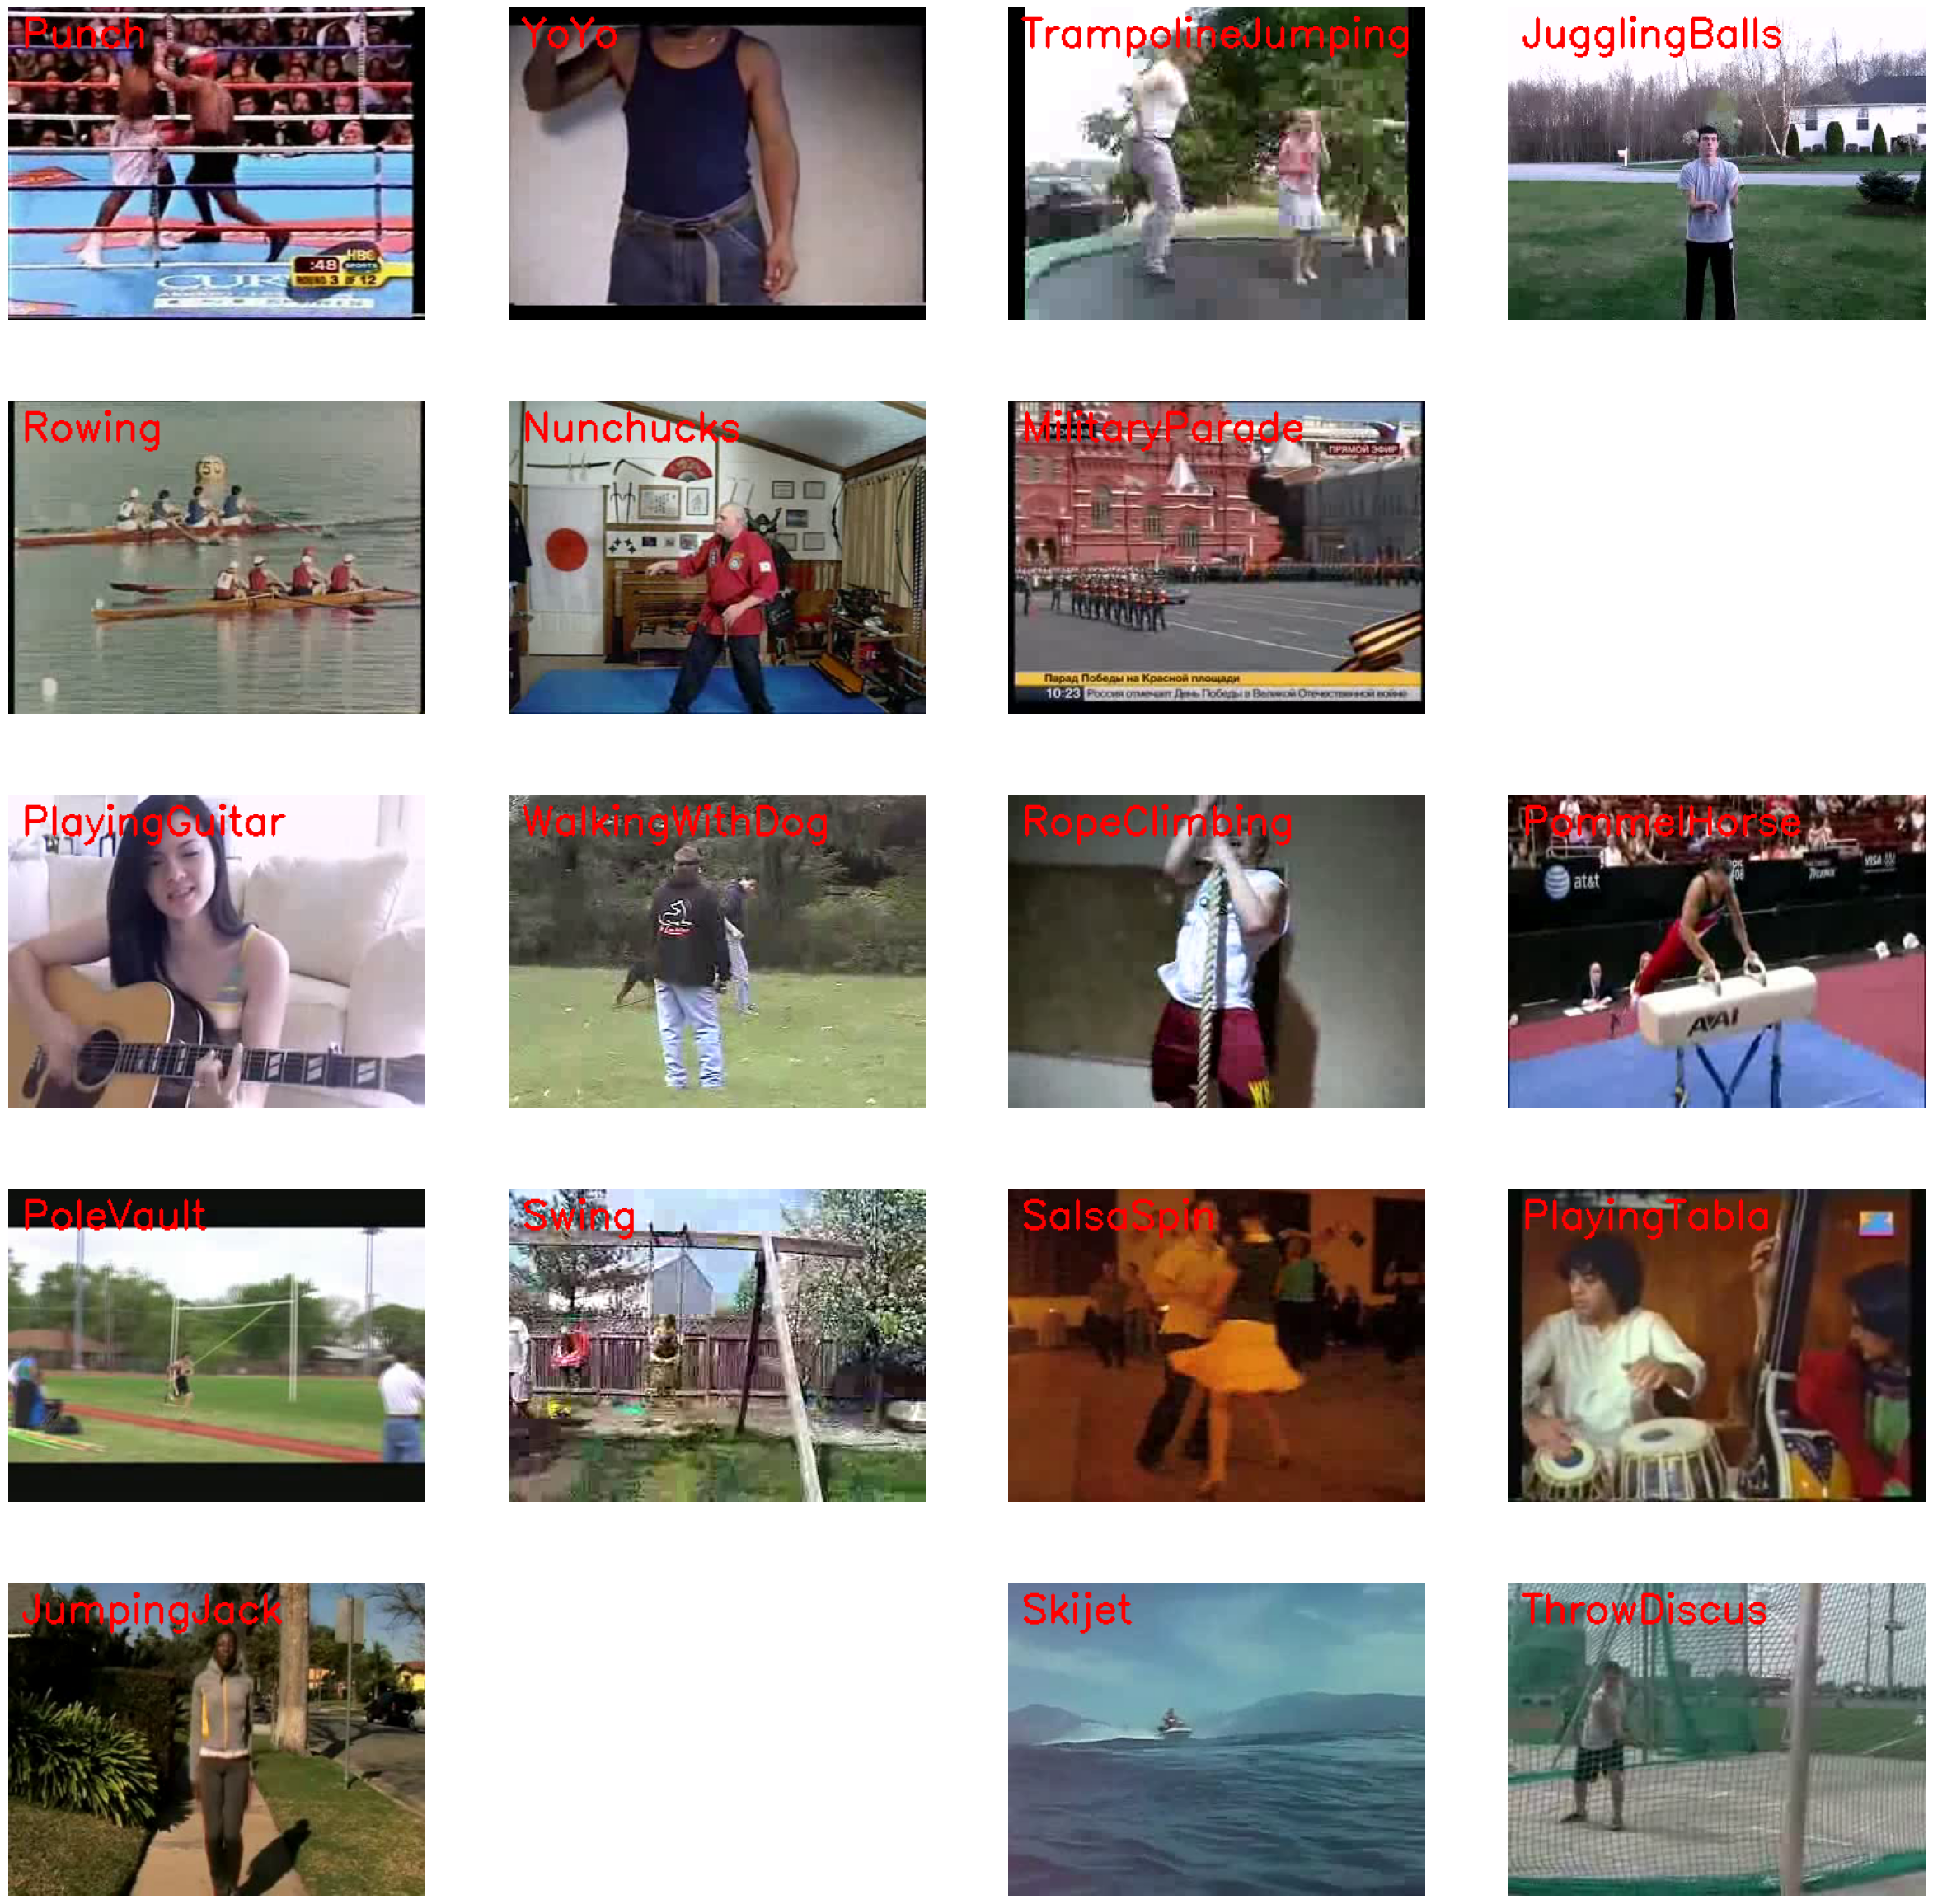

In [13]:
# Matplotlib figure
plt.figure(figsize = (30, 30))

all_classes_names = os.listdir(BASE_DIR)

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 20)
# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):
    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'{BASE_DIR}/{selected_class_Name}')

    # Check if the list is empty
    if not video_files_names_list:
        print(f"No video files found in '{selected_class_Name}'")
        continue  # Skip to the next class

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'{BASE_DIR}/{selected_class_Name}/{selected_video_file_name}')

    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources.
    video_reader.release()

    # Converting the BGR Frame to RGB Frame
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [14]:
image_height, image_width = 64, 64 # 64 x 64 image
max_images_per_class = 8000

dataset_directory = BASE_DIR
classes_list = ["WalkingWithDog", "TaiChi", "Swing", "HorseRace"]

model_output_size = len(classes_list)
model_output_size

4

In [15]:
def frames_extraction(video_path):
  frames_list = [] # To store video frames

  video_reader = cv2.VideoCapture(video_path) # Using CV2

  # Iterate through video frames:
  while True:
    success, frame = video_reader.read() # Reading frame from the video

    if not success:
      break
    resized_frame = cv2.resize(frame, (image_height, image_width)) # Resize the frame
    normalized_frame = resized_frame / 255 # Normalize into 0 - 1

    frames_list.append(normalized_frame) # Append to the frames list

  video_reader.release() # Close the video reader

  return frames_list


In [16]:
frames_extraction(BASE_DIR)

[]

In [17]:
def create_dataset():
  temp_features = []
  features = []
  labels = []

  for class_index, class_name in enumerate(classes_list):
    print(f'Extracting data from class: { class_name }')

    files_list = os.listdir(os.path.join(dataset_directory, class_name)) # Files list in a directory

    for file_name in files_list:
      video_path = os.path.join(dataset_directory, class_name, file_name) # File path

      frames = frames_extraction(video_path)

      temp_features.extend(frames)
    features.extend(random.sample(temp_features, min(max_images_per_class,len(temp_features))))
    labels.extend([class_index] * (max_images_per_class))
    temp_features.clear() # Clear the list for the next iteration

  features = np.array(features)
  labels = np.array(labels)
  return features, labels

In [18]:
!pip install my_module

  Preparing metadata (setup.py) ... done
  Created wheel for my_module: filename=my_module-1.6.2-py3-none-any.whl size=1404 sha256=97ec1605210f4c509627209e5a9f1411daf4c9026c28d5a430dc3c68227651bf
  Stored in directory: /root/.cache/pip/wheels/ea/6f/99/8a43d4d21ab49e14293e432ea3587ec33b41e6685c86f82a88
Successfully built my_module


In [19]:

features, labels = create_dataset()

Extracting data from class: WalkingWithDog
Extracting data from class: TaiChi
Extracting data from class: Swing
Extracting data from class: HorseRace


In [20]:
print(len(features))
print(len(labels))

24000
32000


In [21]:
one_hot_encoded_labels = to_categorical(labels)
one_hot_encoded_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [22]:
if len(features) > len(one_hot_encoded_labels):
    features = features[:len(one_hot_encoded_labels)]
else:
    one_hot_encoded_labels = one_hot_encoded_labels[:len(features)]
    # if len(features) != len(one_hot_encoded_labels):
    # raise ValueError("Input arrays have inconsistent numbers of samples.")
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size=0.2, shuffle=True, random_state=seed_constant)

In [23]:
def create_model():
  model = Sequential() # Sequential model

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(GlobalAveragePooling2D())
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(model_output_size, activation='softmax'))

  print(model.summary())
  return model

model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 60, 60, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                         
                                                        

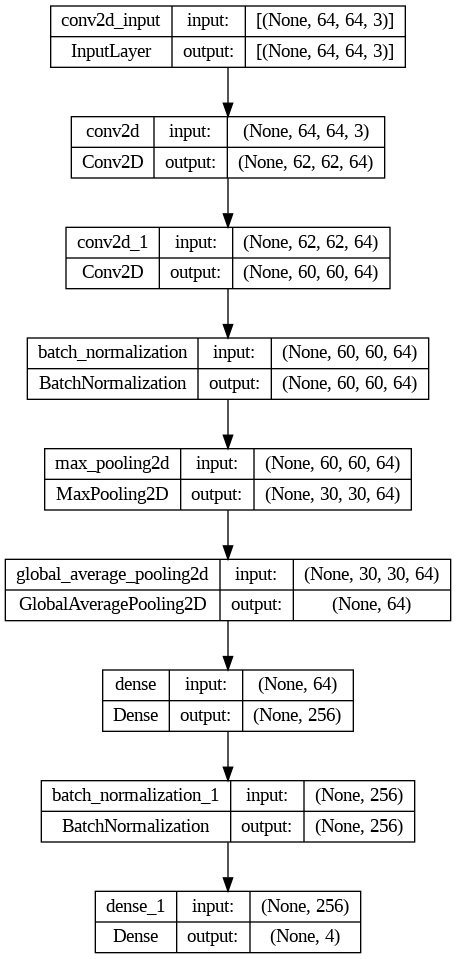

In [24]:
plot_model(model, to_file='model_structure_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15,
                                        mode='min', restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=features_train, y=labels_train, epochs=20, batch_size=4,
                    shuffle=True, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/20
3840/3840 [==============================] - 484s 125ms/step - loss: 0.7661 - accuracy: 0.6723 - val_loss: 1.1012 - val_accuracy: 0.7031
Epoch 2/20
3840/3840 [==============================] - 441s 115ms/step - loss: 0.5290 - accuracy: 0.7936 - val_loss: 0.5700 - val_accuracy: 0.8107
Epoch 3/20
3840/3840 [==============================] - 460s 120ms/step - loss: 0.4040 - accuracy: 0.8466 - val_loss: 0.3756 - val_accuracy: 0.8544
Epoch 4/20
3840/3840 [==============================] - 459s 119ms/step - loss: 0.3527 - accuracy: 0.8677 - val_loss: 0.1755 - val_accuracy: 0.9563
Epoch 5/20
3840/3840 [==============================] - 451s 118ms/step - loss: 0.3137 - accuracy: 0.8824 - val_loss: 0.2526 - val_accuracy: 0.9339
Epoch 6/20
3840/3840 [==============================] - 455s 118ms/step - loss: 0.2823 - accuracy: 0.8956 - val_loss: 0.3775 - val_accuracy: 0.8773
Epoch 7/20
3840/3840 [==============================] - 468s 122ms/step - loss: 0.2635 - accuracy: 0.9062 - val_

In [26]:
model.evaluate(features_test,labels_test)

150/150 [==============================] - 31s 208ms/step - loss: 0.0433 - accuracy: 0.9885


[0.04325158894062042, 0.9885416626930237]

In [ ]:
model_name = 'CNN_Model'
model.save(model_name)

In [28]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [29]:
SAVED_DIR = '/content/drive/MyDrive/'
model.save(f'{ SAVED_DIR }/my_model')

In [30]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  metric_value_1 = history.history[metric_name_1] # Get Metric values using metric names as identifiers
  metric_value_2 = history.history[metric_name_2]
  epochs = range(len(metric_value_1))
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  plt.title(str(plot_name))
  plt.legend()

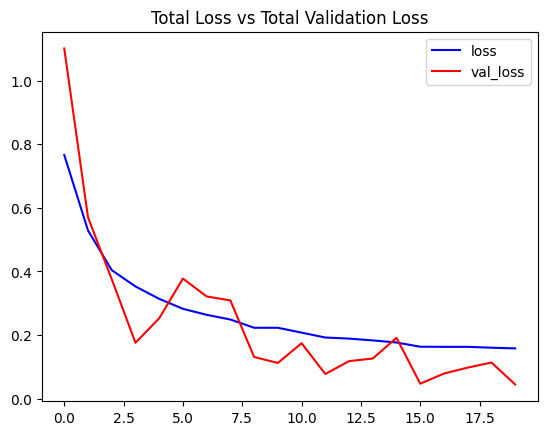

In [31]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

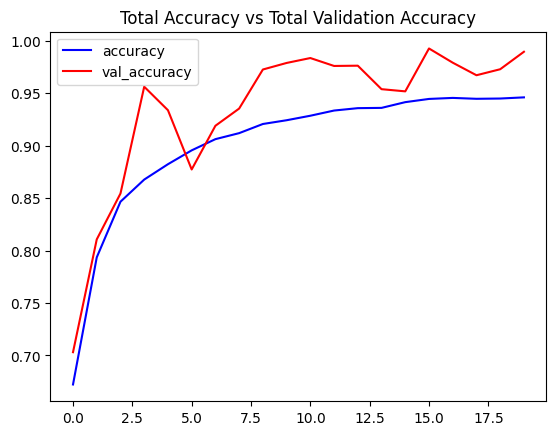

In [32]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [33]:
# SAVED_DIR = '/content/drive/MyDrive'
# model = tf.keras.models.load_model(f'{ SAVED_DIR }/my_model')
model = tf.keras.models.load_model('saved_model/my_model')

In [34]:
def download_youtube_videos(youtube_video_url, output_directory):
  video = pafy.new(youtube_video_url)

  video_best = video.getbest() # Of the highest quality

  output_file_path = f"{ output_directory }/{ video.title }.mp4"

  video_best.download(filepath=output_directory, quiet=True)

  return video.title

In [35]:
def predict_on_live_video(video_file_path, output_file_path, window_size):
    predicted_labels_probabilities_deque = deque(maxlen = window_size)

    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))

    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))

    while True:
        # Reading The Frame
        status, frame = video_reader.read()

        if not status:
            break

        resized_frame = cv2.resize(frame, (image_height, image_width))
        normalized_frame = resized_frame / 255
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        if len(predicted_labels_probabilities_deque) == window_size:
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
            predicted_class_name = classes_list[predicted_label]
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        video_writer.write(frame)

    video_reader.release()
    video_writer.release()

In [36]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.6 MB/s eta 0:00:00


In [37]:
import yt_dlp

In [39]:
output_directory = 'youtube_videos'
os.makedirs(output_directory, exist_ok=True) # Creats The Output directories if it does not exist

# Download the video
video_title = download_youtube_videos('https://www.youtube.com/watch?v=8u0qjmHIOcE', output_directory)

input_video_file_path = f'{output_directory}/{video_title}.mp4'

ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


OSError: ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.

In [38]:
# Setting the Window Size which will be used by the Rolling Average Process
window_size = 25
output_video_file_path = f'{output_directory}/{video_title} -Output-WSize {window_size}.mp4'
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)
VideoFileClip(output_video_file_path).ipython_display(width = 700)

NameError: name 'output_directory' is not defined

In [ ]:
def predict_on_live_video(video_file_path, output_file_path, window_size):
    predicted_labels_probabilities_deque = deque(maxlen = window_size)

    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))

    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))

    while True:
        # Reading The Frame
        status, frame = video_reader.read()

        if not status:
            break

        resized_frame = cv2.resize(frame, (image_height, image_width))
        normalized_frame = resized_frame / 255
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        if len(predicted_labels_probabilities_deque) == window_size:
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
            predicted_class_name = classes_list[predicted_label]
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        video_writer.write(frame)

    video_reader.release()
    video_writer.release()


In [ ]:
output_directory = 'youtube_videos'
os.makedirs(output_directory, exist_ok=True) # Creats The Output directories if it does not exist

# Download the video
video_title = download_youtube_video('https://www.youtube.com/watch?v=8u0qjmHIOcE', output_directory)

input_video_file_path = f'{output_directory}/{video_title}.mp4'

In [ ]:
# Setting the Window Size which will be used by the Rolling Average Process
window_size = 25
output_video_file_path = f'{output_directory}/{video_title} -Output-WSize {window_size}.mp4'
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)
VideoFileClip(output_video_file_path).ipython_display(width = 700)

In [ ]:
def make_average_predictions(video_file_path, predictions_frames_count):
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)
    video_reader = cv2.VideoCapture(video_file_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        _ , frame = video_reader.read()
        resized_frame = cv2.resize(frame, (image_height, image_width))
        normalized_frame = resized_frame / 255
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:
        predicted_class_name = classes_list[predicted_label]
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]
        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")

    video_reader.release()

In [ ]:
make_average_predictions(input_video_file_path, 50)